<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-и-заполнение-пропусков-в-данных" data-toc-modified-id="Исследование-и-заполнение-пропусков-в-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование и заполнение пропусков в данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-площади,-цены,-числа-комнат,-высоты-потолков-и-анализ-редких-и-выбивающихся-значений" data-toc-modified-id="Исследование-площади,-цены,-числа-комнат,-высоты-потолков-и-анализ-редких-и-выбивающихся-значений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование площади, цены, числа комнат, высоты потолков и анализ редких и выбивающихся значений</a></span></li><li><span><a href="#Исследование-время-продажи-квартиры." data-toc-modified-id="Исследование-время-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование время продажи квартиры.</a></span></li><li><span><a href="#Взаимосвязь-данных." data-toc-modified-id="Взаимосвязь-данных.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Взаимосвязь данных.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Согласно документации к данным в табце предоставлены следующие показатели:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib для работы с графиками 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# чтение файла с данными и сохранение в переменную data
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
# получение первых 10 строк таблицы data
display(data.head(5))

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [4]:
# чтение файла с учётом разделителя столбцов
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [5]:
# получение первых 10 строк таблицы data
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300



Посмотрим общую информацию об этих столбцах:

In [7]:
print('Данные таблицы были собраны c ', data['first_day_exposition'].min(),'по',data['first_day_exposition'].max())

Данные таблицы были собраны c  2014-11-27T00:00:00 по 2019-05-03T00:00:00


**Вывод**

В таблице представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Общее количество обьявлений -23 699. Данные представленной таблицы были собраны с 27 ноября 2014 по 3 мая 2019.

В таблице 22 столбца, в 14 из которых выявлены пропуски. 
В названиях колонок нарушений стиля не наблюдается.

Цель проекта - установить параметры, чтобы определять рыночную стоимость объектов недвижимости. 

## Предобработка данных

### Исследование и заполнение пропусков в данных

При первичном изучении данных были выявлены пропуски в нескольких столбцах. Выведем их количество на экран.

In [8]:
# количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропусков в таблице выявлено достаточно много, разберемся с каждым из столбцов с пропусками по порядку:

- **ceiling_height** - высота потолков

In [9]:
# обзор числовых значений в колонке 'ceiling_height'
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В данной колонке логично будет заполнить пропуски медианой по всему набору данных, так как есть строительные стандарты для высоты потолков, к тому же, несмотря на выбросы ( максимальное значение 100 м) медианное и среднее значения выглядят адекватно.

In [10]:
# заполнение пропусков медианным значением
data.ceiling_height= data.ceiling_height.fillna(data.ceiling_height.median())

Далее постмотрим характер пропусков в столбце с количеством этажей: 
- **floors_total** 

In [11]:
# обзор числовых значений в колонке 'floors_total'
data.floors_total.describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропущенных значений в столбце с количеством этажей выявлено незначительное количество (менее 0.4%), в данных явных проблем и выбросов не наблюдается. В связи с этим, пропущенные значения удалим.

In [12]:
# удаляем строки таблицы data , где пропущены значения в столбце floors_total 
data = data.dropna(subset = ['floors_total']).reset_index(drop = True)

Рассмотрим две аналогичных колонки с пропусками:
- **living_area,  kitchen_area**

In [13]:
# обзор числовых значений в колонке 'living_area'
data[['living_area','kitchen_area']].describe()

,living_area,kitchen_area
count,21743.000000,21382.000000
mean,34.462781,10.564128
std,22.037433,5.904316
min,2.000000,1.300000
25%,18.600000,7.000000
50%,30.000000,9.100000
75%,42.300000,12.000000
max,409.700000,112.000000


Данные с жилой площадью и площадью кухни выглядят относительно правдоподобно. Пропуски в данных столбцах, явно зависят от количества комнат. Поэтому, заполним пропуски в living_area, kitchen_area с группировкой по столбцу rooms.

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# заполнение пропусков в столбце 'living_area', 'kitchen_area' с группировкой по количеству комнат
for rooms in data.rooms.unique():
    median_l = data.loc[data['rooms'] == rooms,'living_area'].median()
    median_k = data.loc[data['rooms'] == rooms,'kitchen_area'].median()                  
    data.loc[(data['living_area'].isna()) &( data['rooms'] == rooms),'living_area'] = median_l
    data.loc[(data['kitchen_area'].isna()) &( data['rooms'] == rooms),'kitchen_area'] = median_k

In [16]:
# проверка остались ли пропуски после их заполнения  с группировкой
print('Пропущеных значений в столбце living_area -', \
      data.floors_total.isna().sum(),\
      '\nПропущеных значений в столбце kitchen_area -', data.kitchen_area.isna().sum())

Пропущеных значений в столбце living_area - 0 
Пропущеных значений в столбце kitchen_area - 194


Пропущенные значения в kitchen_area все же остались. Попробуем узнать с чем это связано.

Есть предположение, что оставшиеся пропуски связаны с тем, что определенных обьектах недвижимости не указано количество комнат и медианных данных по кухне также нет. Например, это возможно в студиях.

In [17]:
# вывод на экран значений столбца  rooms, в строках, где kitchen_area = Nan
data[data['kitchen_area'].isna()][['kitchen_area','rooms']].head()

,kitchen_area,rooms
144,NaN,0
347,NaN,0
438,NaN,0
505,NaN,0
605,NaN,0


 Действительно, большинство пропущенных значений в столбце kitchen_area совпадают с нулевыми значениями в столбце rooms.
 
Так как таких пропусков выявлено около 0.8%, заполним оставшиеся пропуски медианой по всем данным.

In [18]:
# заполнение оставшихся пропусков медианным значением
data.kitchen_area = data.kitchen_area.fillna(data.kitchen_area.median())

Далее также рассмотрим две аналогичных колонки:
- **is_apartment,  balcony**

In [19]:
# обзор значений в колонке 'is_apartment'
data.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [20]:
# обзор значений в колонке 'balcony'
data.balcony.value_counts()

1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

В колонках с количеством балконов и определением является ли апартаментами обьект при заполнении пропусков, возможна логическая замена:

- в колонке ‘balcony’ - пропуски заполняем на 0
- в колонке ‘is_apartment’-пропуски заполняем на False.

Проведем соответствующую замену.

In [21]:
# замена пропусков is_apartment значением False
data.is_apartment= data.is_apartment.fillna(value = False)

In [22]:
# замена пропусков balcony значением 0
data.balcony= data.balcony.fillna(value = 0)

Проведем обзор значений в колонке:

- **locality_name**   - название населенного пункта
    

In [23]:
# обзор значений в колонке 'locality_name'
data.locality_name.value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Пропусков в столце с названием населенного пункта было выявлено 49, что составляет около 0.2% от общих данных, поэтому строки с пропусками можно будет удалить.

In [24]:
# удаляем строки таблицы data , где пропущены значения в названии населенного пункта locality_name 
data = data.dropna(subset = ['locality_name']).reset_index(drop = True)

Сделаем обзор колонок с расстояниями до центра, аэропорта, парка и пруда:
- **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest**


In [25]:
# обзор числовых значений в колонке 'airports_nearest','cityCenters_nearest','parks_nearest', 'ponds_nearest'
data[['airports_nearest','cityCenters_nearest','parks_nearest', 'ponds_nearest']].describe()

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest
count,18041.000000,18064.000000,8030.000000,9036.000000
mean,28797.082701,14192.656056,490.580448,518.289509
std,12632.499735,8613.348153,341.572956,278.009558
min,0.000000,181.000000,1.000000,13.000000
25%,18565.000000,9238.000000,288.000000,293.000000
50%,26757.000000,13096.500000,455.000000,503.000000
75%,37273.000000,16285.000000,612.000000,730.000000
max,84869.000000,65968.000000,3190.000000,1344.000000


Пропуски, отраженные в данных колонках лучше всего будет заполнить медианой с группировкой по населенному пункту.


In [26]:
# заполнение пропусков в колонках 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' с группировкой по населенному пункту
for locality_name in data.locality_name.unique():
    for column in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
        median = data.loc[data['locality_name']==locality_name,column].median()
        data.loc[(data[column].isna()) &( data['locality_name'] == locality_name),column] = median

In [27]:
# проверка на наличие пропусков после обработки
data[['airports_nearest','cityCenters_nearest','parks_nearest', 'ponds_nearest']].isna().sum()

airports_nearest       5432
cityCenters_nearest    5432
parks_nearest          5986
ponds_nearest          5517
dtype: int64

Пропуски после заполнения пропусков с группировкой по населенному пункту все еще остались. Посмотрим, с чем может быть связано наличие оставшихся пропусков.

In [28]:
# вывод первых 15 строк колонок 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest','locality_name'
data[['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest','locality_name']].head(15)

,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,locality_name
0,18863.0,16028.0,482.0,755.0,Санкт-Петербург
1,12817.0,18603.0,NaN,584.5,посёлок Шушары
2,21741.0,13933.0,90.0,574.0,Санкт-Петербург
3,28098.0,6800.0,84.0,234.0,Санкт-Петербург
4,31856.0,8098.0,112.0,48.0,Санкт-Петербург
5,NaN,NaN,NaN,NaN,городской посёлок Янино-1
6,52996.0,19143.0,733.0,593.0,посёлок Парголово
7,23982.0,11634.0,460.0,504.0,Санкт-Петербург
8,NaN,NaN,NaN,NaN,посёлок Мурино
9,50898.0,15008.0,460.0,504.0,Санкт-Петербург


Судя по итоговой таблице, можно сделать предположение, что пропуски в расстояниях возникают в населенных пунктах, вне Санкт- Петербурга. Единственный вариант заполнения оставшихся пропусков в данном случае - это заполнить их медаинами по всему набору данных.

In [29]:
# заполнение оставшихся пропусков медаинами по всему набору данных
for column in ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']:
    data[column]=data[column].fillna(data[column].median())

Осталось проверить две колонки с данными о количестве парков и прудов:
- **ponds_around3000, parks_around3000**

In [30]:
# обзор значений в колонке 'ponds_around3000'
data.ponds_around3000.value_counts()

0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around3000, dtype: int64

In [31]:
# обзор значений в колонке 'parks_around3000'
data.parks_around3000.value_counts()

0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around3000, dtype: int64

Выбросов среди значений в колонках не наблюдается. Все значения в пределах от 0 до 3.

В связи с тем, что данные из вышеперечисленных двух колонок нам не сильно важны при дальнейшем анализе, заполним их медианными значениями.

In [32]:
# заполнение пропусков в колонках 'parks_around3000', 'ponds_around3000' 
data.parks_around3000 = data.parks_around3000.fillna(data.parks_around3000.median())
data.ponds_around3000 = data.ponds_around3000.fillna(data.ponds_around3000.median())

Осталась одна колонка с пропусками- **days_exposition** с информацией сколько дней было размещено объявление (от публикации до снятия).  Посмотрим характер их распределения, чтобы понимать возможную причину появления пропусков.

Для этого посмотрим как распределены пропуски в колонке days_exposition в соответствии с колонкой first_day_exposition.

In [33]:
# распределение пропусков относительно первичной даты публикации
data[data['days_exposition'].isna()][['first_day_exposition','days_exposition']].head(10)

,first_day_exposition,days_exposition
0,2019-03-07T00:00:00,NaN
7,2019-04-18T00:00:00,NaN
44,2018-11-18T00:00:00,NaN
45,2018-12-02T00:00:00,NaN
46,2019-01-31T00:00:00,NaN
49,2018-11-22T00:00:00,NaN
52,2017-09-22T00:00:00,NaN
71,2019-03-27T00:00:00,NaN
81,2018-12-27T00:00:00,NaN
84,2019-03-13T00:00:00,NaN


In [34]:
# изменение типа данных в first_day_exposition и обзор данных
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = "%Y-%m-%dT%H:%M:%S")
print(data['first_day_exposition'].min(),data['first_day_exposition'].max())

2014-11-27 00:00:00 2019-05-03 00:00:00


Итак мы поняли, что данные были собраны за период с 2014-11-27 по 2019-05-03. По распределению времени размещения обьявлений с недостающими данными о сроках экспозиции, можно сделать вывод, что, на момент формирования таблицы, эти обьявления были относительно свежими и  видимо,еще находились в продаже.
 
Для данного столбца, нет подходящего значения на замену, поэтому оставим эти значения пустыми.

In [35]:
# замена на пустую строку
data.days_exposition = data.days_exposition.fillna(" ")

In [36]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

**Вывод**

В ходе анализа были определены, изучены и заполнены  пропущенные значения в 14 колонках : 
- **ceiling_height**: 
В данной колонке, было принято решение заполнить пропуски , медианой по всему набору данных, так как есть строительные стандарты для высоты потолков, к тому же, несмотря на выбросы медианное и среднее значения выглядят не искаженными. Причиной пропуска значений может быть банальная ошибка ввода данных, так как часть данных была заполнена вручную.


- **floors_total** : 
В этой колонке также было принято решение заполнить пропуски , медианой по всему набору данных. Причины возникновения ошибок - аналогичны предыдущей колонке.


- **living_area**, **kitchen_area**: Большинство пропусков в столбцах с информацией о жилой площади и площади кухни, были заполнены медианой с группировкой по количеству комнат( столбцу rooms). Остальная часть -  медианой по всем данным (около 0.8% )
    
    Есть предположение, что оставшиеся после заполнения с группировкой пропуски связаны с тем, что определенных обьектах недвижимости не указано количество комнат и поэтому медианных данных по кухне также нет. Например, это возможно в студиях. 
    
    
- **is_apartment**, **balcony**: 
Для пропущенных значений в данных столбцах, можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски были заменены на 0 в стобце с колчеством балконов - balcony, и на False в столбце is_apartment соответственно.

- **locality_name**: Данные с названием населенного пункта нам будут важны для дальнейшего анализа, поэтому было принято решение  исключить строки с пропусками (около 0.2% от общих данных). Причина пропусков может быть технической.


- **airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest** : Большинство пропусков в столбцах с информацией о расстоянии до центра, аэропорта, парка и пруда, были заполнены медианой  с группировкой по населенному пункту. Остальная часть -  медианой по всем данным (около 0.8% ).
    
    Так как данные из этих столбцов получены автоматически на основе картографических данных, причина пропусков может быть скрыта в технической стороне сбора данных.



- **days_exposition**
    По распределению времени размещения обьявлений с недостающими данными о сроках экспозиции, можно предположить что,пропуски связаны с тем, что на момент формирования таблицы, эти обьявления были относительно свежими и  видимо, соответсвующие им обьекты недвижимости еще находились в продаже.
    Пропуски были заполнены пустыми строками.

### Изменение типов данных

Изменение типа данных в first_day_exposition, с данными о первичной даты публикации,  уже была произведена в предыдущем пункте. 

Помотрим какие типы данных встречаются в остальных колонках таблицы.

In [37]:
# обзор типов значений в колонках
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                 object
dtype: object

Итак, замена вещественного типа данных (float64) на целочисленный (int) необходима в следующих колонках:

1. **'floors_total'** - так как значения в данном столбце выражены в количестве этажей.

2. **'balcony'** - так как значения в данной колонке - это количество балконов в квартире.

3. **'days_exposition'** так как значения в данном столбце выражены в количестве полных дней.

In [38]:
# замена типа данных на integer (целое число) в столбце 'days_employed':
data['floors_total'] = data['floors_total'].astype('int')

In [39]:
# замена типа данных на  (целое число) в столбце 'balcony':
data['balcony'] = data['balcony'].astype('int')

In [40]:
# замена типа данных на  (целое число) в столбце 'days_exposition':
data['days_exposition']=data.loc[data['days_exposition']!=" "]['days_exposition'].astype('int')

Для дальнейшего анализа данных нам также будут важны значения, представленные  столбце locality_name - с названием населенного пункта. Обратим внимание на этот столбец. Выведем его уникальные значения и проверим на дубликаты.

In [41]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях населенных пунктов часто встречаются дубликаты, так как используется разные типы записи. Попробуем избавиться от некоторых из них с помощь укороченной записи населенных пунктов.

Для этого создадим новый столбец 'locality_name_new', где будут удалены такие поясняющие слова как "поселок" , 'деревня ', "коттеджный" и т.п.

In [42]:
# создадим новый столбец с обновленными названиями населенных пунктов
data['locality_name_new'] = data['locality_name']
for repl in ['поселок ', 'деревня ', 'посёлок ', 'городской ', 'коттеджный ','городского типа ']:
    data['locality_name_new'] = data['locality_name_new'].str.replace(repl,'')
    
# удаление дубликатов
data[['locality_name', 'locality_name_new']].drop_duplicates()

,locality_name,locality_name_new
0,Санкт-Петербург,Санкт-Петербург
1,посёлок Шушары,Шушары
5,городской посёлок Янино-1,Янино-1
6,посёлок Парголово,Парголово
8,посёлок Мурино,Мурино
...,...,...
22807,деревня Нижняя,Нижняя
22917,коттеджный посёлок Лесное,Лесное
23222,деревня Тихковицы,Тихковицы
23279,деревня Борисова Грива,Борисова Грива


**Вывод**

В данном пункте была произведена замена вещественного типа данных (float64) на целочисленный (int) в следующих колонках:

- **'floors_total'** - количество этажей.
- **'balcony'** -  количество балконов в квартире.
- **'days_exposition'** - где отражено сколько дней было размещено обьявление

Тип данных в колонке **'first_day_exposition'** был также изменен на datetime64, еще ранее в пункте 2.1.

Также была создана новая колонка **locality_name_new**, на основе первоначальной- locality_name, с обновленными названиями населенных пунктов и обработанными дубликатами.


## Расчёты и добавление результатов в таблицу


Для дальнейшего анализа нам необходимо посчитать и добавить в таблицу:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, 
- отношение площади кухни к общей.

Добавим в общую таблицу data столбец 'price_m2',где будет отражена цена квадратного метра, с помощью деления конечной цены на общую площадь.

In [43]:
# добавление нового столбца price_m2 со значениями цен за квадратный метр
data['price_m2']=data.last_price/data.total_area 

День недели, месяц и год публикации объявления отобразим в разных столбцах - 'weekday','month','year' и также добавим в общую таблицу.

In [44]:
# формирование новых столбцов с данными о дне недели, месяце и годе публикации
data['weekday']=pd.DatetimeIndex(data.first_day_exposition).weekday
data['month']=pd.DatetimeIndex(data.first_day_exposition).month
data['year']=pd.DatetimeIndex(data.first_day_exposition).year

In [45]:
# обзор значений новых столбцов
data[['weekday','month','year']].head()

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
3,4,7,2015
4,1,6,2018


Далее необходимо создать новый столбец с категоризацией по этажу квартиры; варианты — первый, последний, другой.

Для этого создадим функцию floor_category.

In [46]:
# составление функции floor_category для распределения этажей по категориям 
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']: 
        return 'последний'
    return 'другой'


In [47]:
# применим функцию floor_category к data и запишем значения в новый столбец
data['floor_category'] = data.apply(floor_category, axis = 1)

Далее находим соотношение жилой и общей площади, методом деления значений из living_area на total_area, и записываем эти данные в новый столбец - 'living/total'.


In [48]:
# соотношение жилой и общей площади
data['living/total']=data.living_area/data.total_area

Аналогичным методом находим отношение площади кухни к общей и записываем эти данные в новый столбец - 'kitchen/total'

In [49]:
#а также отношение площади кухни к общей.
data['kitchen/total']=data.kitchen_area/data.total_area

**Вывод**

Итак, были посчитаны и добавлены в основную таблицу data следующие данные:
- цена квадратного метра - **data['price_m2']**

- день недели публикации объявления - **data['weekday']**

- месяц публикации объявления - **data['month']**

- год публикации объявления - **data['year']**

- столбец с соответсвующей категорией этажа - **data['floor_category']**

- соотношение жилой и общей площади- **data['living/total']**

- а также отношение площади кухни к общей - **data['kitchen/total']**

Данные из новых столбцов пригодятся для дальнейшего анализа. 

## Исследовательский анализ данных

### Исследование площади, цены, числа комнат, высоты потолков и анализ редких и выбивающихся значений

Изучим следующие параметры: 
- площадь - **'total_area'**
- цена на момент снятия с публикации - **last_price** 
- цена квадратного метра - **'price_m2'**
- число комнат - **rooms**
- высота потолков - **ceiling_height**

Также исключим редкие и выбивающихся значения, и занесем данные из диапазона нормальных значений в новый список - **good_data**.

In [50]:
# общие данные о столбце total_area
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

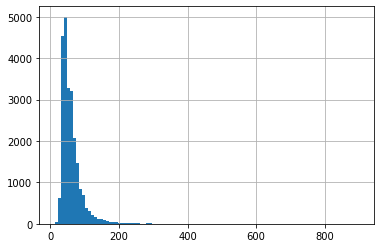

In [51]:
# гистограмма по значениям столбца total_area
data['total_area'].hist(bins=100)

Судя по гистограмме, выбивающиеся значения есть, но их незначительное количество - большинство квартир имеют жилую площадь до 150 м2, что кажется абсолютно реальным. Медианное и среднее значения отличаются незначительно, т.е. можно сделать вывод, что данные несильно искажены имеющимися выбросами.

Посмотрим область нормальных значений для данного столбца.

(0, 200)

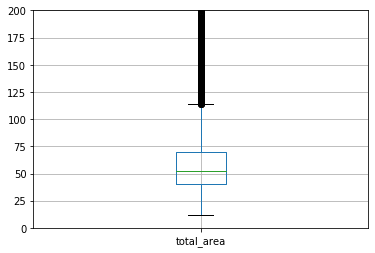

In [52]:
# диаграмма размаха столбца total_area
data.boxplot('total_area')
plt.ylim(0,200)

In [53]:
#  функция для определения квантилей 
def quantile(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1 # iqr
    
    # границы интервала наиболее вероятных значений
    print('Верхняя граница нормальных значений:', q3 + 1.5 * iqr)
    
    if (q1 - 1.5 * iqr)< column.min():
        print ('Нижняя граница нормальных значений:',column.min())
    else:
        print ('Нижняя граница нормальных значений:',q1 - 1.5 * iqr)

In [54]:
# границы интервала наиболее вероятных значений
quantile(data['total_area'])

Верхняя граница нормальных значений: 114.25
Нижняя граница нормальных значений: 12.0


Итак, с помощью диаграммы размаха была определена область нормальных значений в столбце total_area- от 12 до 114.25 м2. 
Чтобы не отсеивать большое количество данных возьмем приближенное в верхнему числу значение- 120, что кажется абсолютно реальным.

In [55]:
#создание новой таблицы без аномальных выбросов
good_data = data.query('total_area<=120')
# обзор итоговых значений в столбце total_area
good_data.total_area.describe()

count    22510.000000
mean        54.835104
std         20.072238
min         12.000000
25%         39.512500
50%         50.400000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64

- Анализ данных столбца **last_price**.

In [56]:
# общие данные о столбце last_price
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

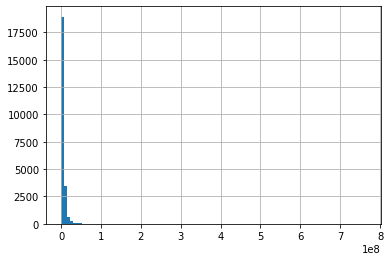

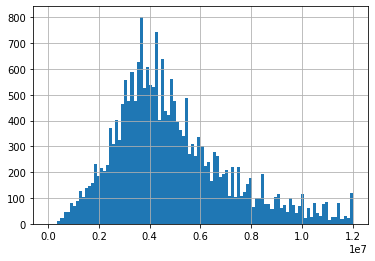

In [57]:
# гистограмма по значениям столбца last_price
data['last_price'].hist(bins=100)
plt.show()
# гистограмма по значениям столбца last_price с границей до 10 млн
data['last_price'].hist(bins=100,range=(0,12000000))

Судя по гистограмме, в данных есть сильно выбивающиеся значения  - большинство же квартир имеют цену до 10 млн, что кажется реальным. Медианное и среднее значения отличаются незначительно, т.е. можно сделать вывод, что данные несильно искажены имеющимися выбросами.
Посмотрим область нормальных значений для данного столбца.

(-1000000, 20000000)

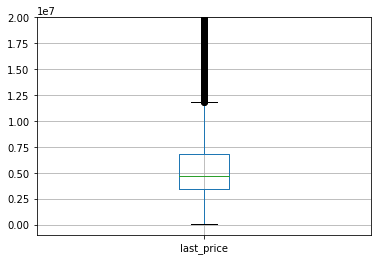

In [58]:
# диаграмма размаха столбца last_price
data.boxplot('last_price')
plt.ylim(-1000000,20000000)

In [59]:
# границы интервала наиболее вероятных значений
quantile(data['last_price'])

Верхняя граница нормальных значений: 11875000.0
Нижняя граница нормальных значений: 12190.0


Итак, с помощью диаграммы размаха была определена область нормальных значений в столбце last_price- от 12190 до 11 897 500 рублей. Чтобы не отсеивать большое количество данных, примем за верхнюю  границу - 12 млн. рублей, что кажется абсолютно реальным.

Также обновим таблицу good_data, без аномальных выбросов.

In [60]:
# отбрасываем редкие и выбивающиеся значения и обновляем good_data
good_data = good_data.query('last_price<12000000')
good_data.last_price.describe()

count    2.145600e+04
mean     4.830419e+06
std      2.217268e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      5.990000e+06
max      1.199900e+07
Name: last_price, dtype: float64

- Анализ данных столбца **price_m2**.

In [61]:
# общие данные о столбце price_m2
data['price_m2'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_m2, dtype: float64

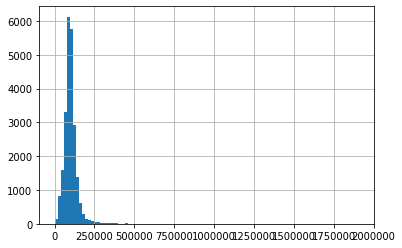

In [62]:
# гистограмма по значениям столбца price_m2
data['price_m2'].hist(bins=100)

Судя по гистограмме, в данных также есть сильно выбивающиеся значения  - большинство же квартир имеют цену за квадратный метр до 250 тысяч рублей, что кажется реальным. Медианное и среднее значения отличаются незначительно.

Посмотрим область нормальных значений для данного столбца.

(0, 250000)

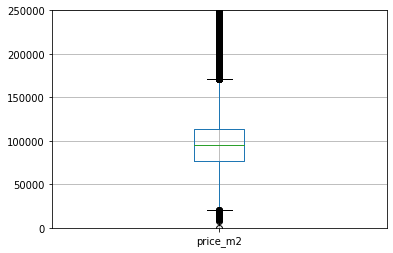

In [63]:
# диаграмма размаха столбца price_m2
data.boxplot('price_m2')
plt.ylim(0,250000)

In [64]:
# границы интервала наиболее вероятных значений
quantile(data['price_m2'])

Верхняя граница нормальных значений: 170683.80698882308
Нижняя граница нормальных значений: 20095.516270743254


Итак, с помощью диаграммы размаха была определена область нормальных значений в столбце price_m2 - от 20 126 до 170 763 рублей. Примем за верхнюю границу значение  - 180 000 рублей, а за нижнюю - 20000, что выглядит абсолютно реальным.
Также обновим таблицу good_data, без аномальных выбросов.

In [65]:
# отбрасываем редкие и выбивающиеся значения и обновляем good_data
good_data = good_data.query('20000< price_m2 <180000')
good_data.price_m2.describe()

count     21171.000000
mean      92100.487590
std       27848.543014
min       20063.694268
25%       75000.000000
50%       92857.142857
75%      109190.422120
max      179980.000000
Name: price_m2, dtype: float64

- Анализ данных столбца **rooms**.

In [66]:
# общие данные о столбце rooms
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

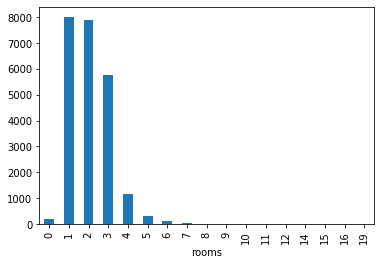

In [67]:
# диаграмма по значениям столбца rooms
(data.groupby('rooms')['last_price'].count().plot(kind='bar'))

По гистограмме видно, что чаще всего можно встретить квартиры до 5 комнат, что похоже на действительность. Но опять же, выбросы в данных присутствуют. Посмотрим область нормальных значений с помощью диаграммы размаха и квантилей.

<function matplotlib.pyplot.show(*args, **kw)>

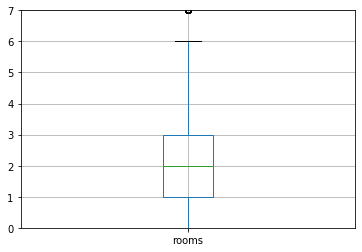

In [68]:
# диаграмма размаха столбца rooms
data.boxplot('rooms')
plt.ylim(0,7)
plt.show

In [69]:
# границы интервала наиболее вероятных значений
quantile(data['rooms'])

Верхняя граница нормальных значений: 6.0
Нижняя граница нормальных значений: 0


Примем границы нормальных значений(до 6 комнат), как критерий отсеивания аномальных значений и снова обновим таблицу good_data.

In [70]:
# отбрасываем редкие и выбивающиеся значения и обновляем good_data
good_data = good_data.query('rooms < 6')
good_data.rooms.describe()

count    21165.000000
mean         1.920813
std          0.894007
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

- Анализ данных столбца **ceiling_height**

In [71]:
# общие данные о столбце ceiling_height
data['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

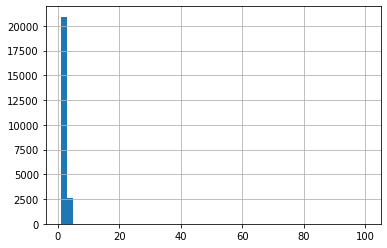

In [72]:
# гистограмма по значениям столбца ceiling_height
data['ceiling_height'].hist(bins=50)

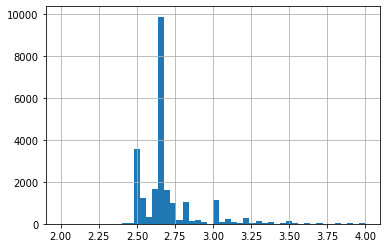

In [73]:
# гистограмма по значениям столбца ceiling_height с границей от 2 до 4 м
data['ceiling_height'].hist(bins=50,range=(2,4))

Судя по гистограммам, можно увидеть, что в данных также есть сильно выбивающиеся значения - большинство же квартир имеют высоту потолков до 3м, что кажется реальным. Медианное и среднее значения отличаются незначительно.
Посмотрим область нормальных значений для данного столбца.

<function matplotlib.pyplot.show(*args, **kw)>

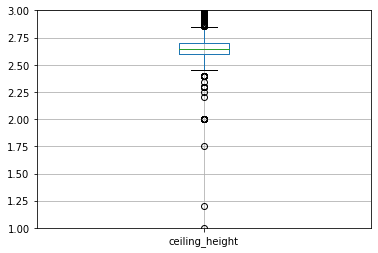

In [74]:
# диаграмма размаха столбца ceiling_height
data.boxplot('ceiling_height')
plt.ylim(1,3)
plt.show

In [75]:
# границы интервала наиболее вероятных значений
quantile(data['ceiling_height'])

Верхняя граница нормальных значений: 2.8500000000000005
Нижняя граница нормальных значений: 2.45


Чтобы не потерять большое количество данных, немного округлим границы интервала нормальных значений - от 2.45 м до 3.00 м.

In [76]:
# отбрасываем редкие и выбивающиеся значения и обновляем таблицу good_data
good_data = good_data.query('2.45 <= ceiling_height <= 3.00')
good_data.ceiling_height.describe()

count    20239.000000
mean         2.644781
std          0.109755
min          2.450000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64


В пункте 4.1 были изучены следующие параметры: площадь, цена, число комнат, высота потолков. 

Для каждого параметра :
- построены гистограммы и диаграммы размаха, 
- посчитаны среднее и медиана
- определены границы нормальных значений
- были убраны редкие и выбивающиеся значения

Данные с нормальными значениями, без выбросов, были сохранены в финальной таблице good_data.
Изначально в исходной таблице было 23699 значений, из которых финальной таблице good_data осталось 20 239.
Остальные значения были признаны аномальными, что составляет около 15% от изначальных данных.

### Исследование время продажи квартиры.

* Изучим время продажи квартиры.

In [77]:
# общие данные о столбце days_exposition
data.days_exposition.describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

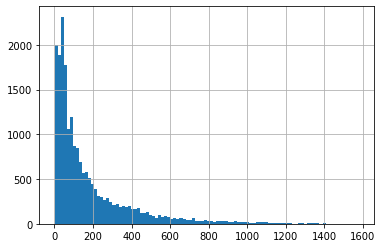

In [78]:
# гистограмма по значениям столбца days_exposition
data.days_exposition.hist(bins=100)

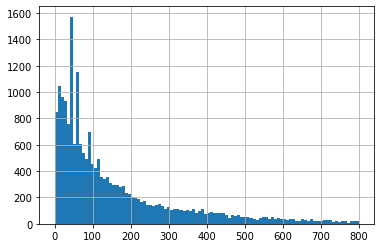

In [79]:
# гистограмма по значениям столбца days_exposition с границей от 0 до 800 дней
data.days_exposition.hist(bins=100,range=(0,800))

Судя по гистограммам столбца days_exposition, можно увидеть, что в данных также есть сильно выбивающиеся значения - большинство же обьявлений были выставлены до 300 дней, что кажется реальным для продажи недвижимости.

Медианное и среднее значения сильно отличаются.Стандартное отлонение также велико - эти факторы свидетельствуют о возможных серьезных выбросах.

Посмотрим область нормальных значений для данного столбца.

(0, 600)

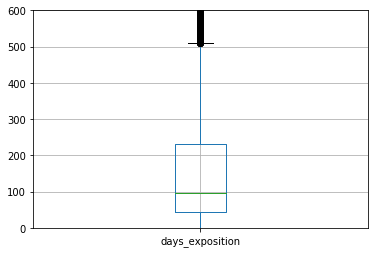

In [80]:
# диаграмма размаха столбца days_exposition
data.boxplot('days_exposition')
plt.ylim(0,600)

In [81]:
# границы интервала наиболее вероятных значений
quantile(data['days_exposition'])

Верхняя граница нормальных значений: 510.0
Нижняя граница нормальных значений: 1.0


Примем верхнюю границу в 600 дней. Это число кажется разумным: дольше обьявление висит редко. За нижнюю - объявления, которые были опубликованы до 9 дней(аномально быстрые продажи). 

In [82]:
# отбрасываем редкие и выбивающиеся значения и обновляем таблицу good_data
good_data = good_data.query('9<= days_exposition <= 600')
good_data.days_exposition.describe()

count    16035.000000
mean       140.864983
std        133.822286
min          9.000000
25%         45.000000
50%         90.000000
75%        194.000000
max        600.000000
Name: days_exposition, dtype: float64

In [83]:
data['days_exposition'].describe(percentiles=[0.05, 0.1])

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
5%           9.000000
10%         17.000000
50%         95.000000
max       1580.000000
Name: days_exposition, dtype: float64

За аномально быструю продажу примем значения до 9 дней. 

**Вывод.**

В ходе анализа столбца days_exposition были выявлены сильно выбивающиеся значения. Было отсеяно около 3000 аномальных значений - где количество дней в продаже выше 600 дней.

В ходе исследовательского анализа данных была создана таблица good_data,в которой содержатся данные в пределах нормальных значений. Далее выявим взаимосвязь различных данных.

### Взаимосвязь данных.

1. Исследование факторов, влияющих на стоимость квартиры.

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

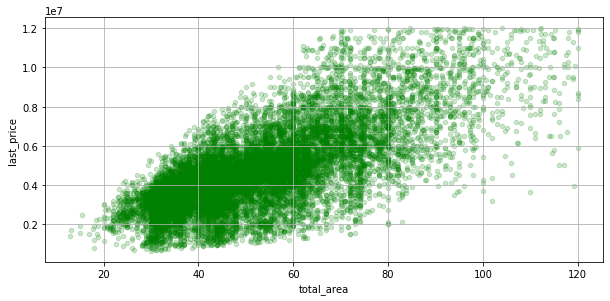

In [84]:
# построение точечного графика для визуализации распределения значений
(good_data
 .plot(x = 'total_area',
       y = 'last_price', 
       kind = 'scatter',
       figsize = (10,4.5), 
       alpha = 0.2, 
       grid = True,
       color = 'green') 
)

In [85]:
# коэффициент Пирсона
good_data['last_price'].corr(good_data['total_area'])

0.7183739077249649

Сила взаимосвязи между площадью квартиры и ценой высокая - чем больше общая площадь квартиры, тем выше цена.

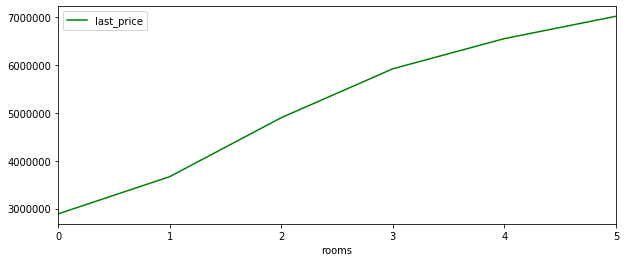

In [86]:
# построение точечного графика для визуализации распределения значений
(good_data.pivot_table(index = 'rooms',values = 'last_price')
 .plot( color = 'green',figsize = (10,4)))

In [87]:
# коэффициент Пирсона
good_data['last_price'].corr(good_data['rooms'])

0.455608769459029

Сила взаимосвязи между количеством комнат и ценой умеренная - чем больше количество комнат, тем выше стоимость квартиры.

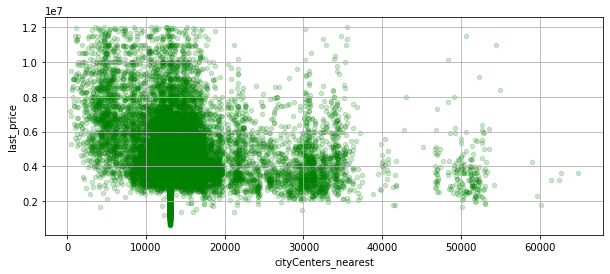

In [88]:
# построение точечного графика для визуализации распределения значений
good_data.plot(x = 'cityCenters_nearest',
               y = 'last_price',
               kind = 'scatter',
               figsize = (10,4),
               alpha = 0.2, 
               grid = True,
               color = 'green') 

In [89]:
good_data['last_price'].corr(good_data['cityCenters_nearest'])

-0.18899523781944377

Видна обратная и слабая взаимосвязь между ценой и расстоянием до центра - чем дальше от центра, тем меньше цена. На графике также виден явный всплеск медианных значений.

- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

- Также выявим зависимость от даты размещения: дня недели, месяца и года.

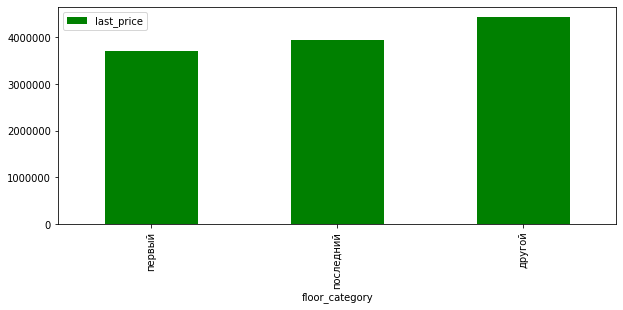

In [90]:
# построение столбцатой диаграммы для визуализации распределения значений в зависимоти от этажа
(good_data.pivot_table(index = 'floor_category',values = 'last_price',aggfunc = 'median')
 .sort_values(by = 'last_price')
 .plot(kind = 'bar',color = 'green',figsize=(10,4)))

In [91]:
good_data['last_price'].corr(good_data['floor'])

0.15762116024023204

Также изучим зависимость от даты размещения: 
- data['weekday']
- месяца публикации объявления - data['month']
- года публикации объявления - data['year']

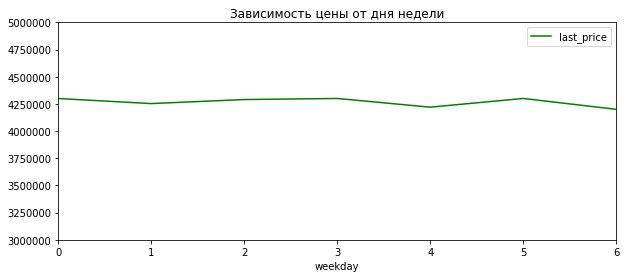

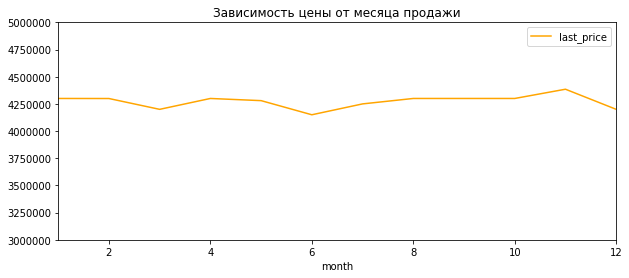

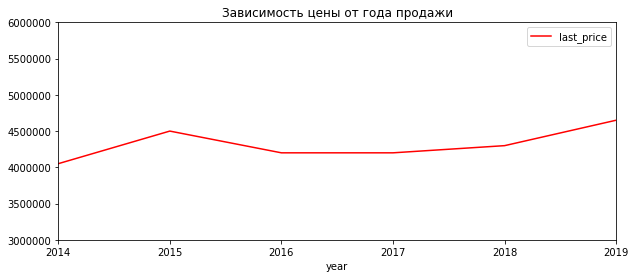

In [92]:
# построение линейных графиков для визуализации распределения значений цены в зависимоти от даты 
(good_data.pivot_table(index = 'weekday',values = 'last_price',aggfunc = 'median')
.plot(ylim = (3000000,5000000),figsize = (10, 4),color = 'green'))
plt.title('Зависимость цены от дня недели')
(good_data.pivot_table(index = 'month',values = 'last_price',aggfunc = 'median')
.plot(ylim = (3000000,5000000),figsize=  (10, 4),color = 'orange'))
plt.title('Зависимость цены от месяца продажи')
(good_data.pivot_table(index = 'year',values = 'last_price',aggfunc = 'median')
.plot(ylim = (3000000,6000000),figsize = (10, 4),color = 'red'))
plt.title('Зависимость цены от года продажи')
plt.show()


**Вывод**

В данном пункте было проведено исследование факторов, влияющих на стоимость квартиры, таких как площадь, число комнат, удалённость от центра,этаж.

Сильнейшее влияние на цену оказывает площадь квартиры -  чем больше общая площадь, тем выше цена.

Меньше всего - этаж, на котором расположена квартира и расстояние до центра. Зависимость оказалось достаточно слабой.

Сила взаимосвязи между количеством комнат и ценой оказалась умеренной.

Также была изучена зависимость между ценой и датой размещения обьявления. Сильной взаимосвязи не обнаружено, но судя по графикам можно сказать, что в июне и в декабре средняя была цена незначительно меньше, чем в другие месяцы. Также в 2015 и 2019 году был отмечен рост средней цены квартир.


2. Общие сведения о таблице.

- Выберем 10 населённых пунктов с наибольшим числом объявлений. 

- Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

- Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [93]:
# 10 населённых пунктов с наибольшим числом объявлений. 
(good_data['locality_name_new'].value_counts()).head(10)

Санкт-Петербург    10147
Мурино               495
Кудрово              389
Шушары               377
Всеволожск           301
Парголово            272
Колпино              269
Пушкин               245
Гатчина              228
Выборг               179
Name: locality_name_new, dtype: int64

In [94]:
# вычисление средней цены квадратного метра 
(good_data
         .groupby('locality_name_new')
         .agg({'locality_name':'count','price_m2':'mean'})
         .sort_values(by='locality_name',ascending=False).head(10))

,locality_name,price_m2
locality_name_new,,
Санкт-Петербург,10147,103394.924064
Мурино,495,86013.417527
Кудрово,389,94394.319199
Шушары,377,77870.880171
Всеволожск,301,66924.395692
Парголово,272,89043.546058
Колпино,269,74476.150545
Пушкин,245,98480.930429
Гатчина,228,68602.049414


In [95]:
# 5 населённых пунктов с наименьшей ценой за квадратный метр
(good_data.groupby('locality_name_new')
    .agg({'locality_name':'count','price_m2':'mean'})
    .sort_values(by='locality_name',ascending=False).tail(5))

,locality_name,price_m2
locality_name_new,,
Сумино,1,30386.740331
Ленинское,1,63366.336634
Лесное,1,45690.298507
Лесогорский,1,27272.727273
Агалатово,1,57187.500000


**Вывод**

- Наибольшее количество обьявлений было выявлено в следующих  населенных пунктах : Санкт-Петербург,Мурино,           Кудрово, Шушары,Всеволожск,Парголово ,Колпино,Пушкин ,Гатчина,Выборг .

- Самая высокая средняя цена за квадратный метр в Санкт-Петербурге -  103 377 р за м2

- Наименьшая цена за м2 - в населенном пункте Кисельня - 20 909 р за м2.

3. Анализ данных квартир в Санкт- Петербурге.

Выделим в отдельную таблицу **data_spb** данные о квартирах в черте города Санкт-Петербург.

Далее выясним,  какая область в Санкт-Петербурге входит в центр.

In [96]:
# Создаем столбец с расстоянием до центра в километрах
good_data['cityCenters_km']=(good_data.cityCenters_nearest/1000).astype('int')
# Выделяем данные для СПб в таблицу data_spb
data_spb=good_data.query('locality_name_new == "Санкт-Петербург"')

Text(0.5, 1.0, 'Зависимость средней цены за м2 от удаленности от центра')

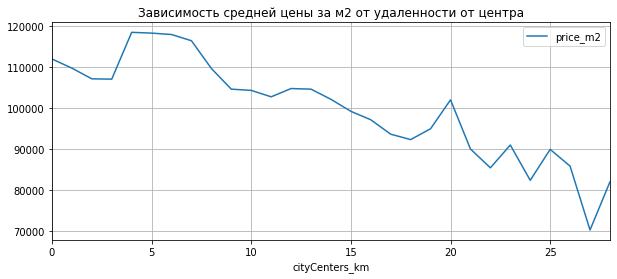

In [97]:
# строим график зависимости средней цены за м2 от удаленности от центра
data_spb.pivot_table(index='cityCenters_km', values='price_m2').plot(grid=True,figsize=(10,4))
plt.title('Зависимость средней цены за м2 от удаленности от центра')


График менятся примерно в области 7 км от центра. Возьмем данную удаленность для выделения сегмента центральных квартир и создадим таблицу **data_spb_centre**, с данными о квартирах в центральной части города.

In [98]:
def centre_category(row):
    if row['cityCenters_km'] <= 7:
        return 'центр'
    return 'за пределами центра'

data_spb['centre_category'] = data_spb.apply(centre_category, axis = 1)

In [99]:
# данные о центральных квартирах добавляем в новую таблицу data_spb_centre
data_spb_centre=data_spb.query('cityCenters_km <= 7')

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры.

In [100]:
# обзор данных в определенных столбцах
data_spb_centre[['total_area','last_price','price_m2','rooms','ceiling_height']].describe()

,total_area,last_price,price_m2,rooms,ceiling_height
count,1347.000000,1.347000e+03,1347.000000,1347.000000,1347.000000
mean,62.693578,7.017856e+06,115506.409699,2.209354,2.716013
std,20.879989,2.170629e+06,25097.186587,0.937482,0.140449
min,13.200000,1.686000e+06,26250.000000,0.000000,2.460000
25%,46.000000,5.300000e+06,96244.122966,2.000000,2.650000
50%,60.000000,6.800000e+06,112440.191388,2.000000,2.650000
75%,77.000000,8.500000e+06,133358.171883,3.000000,2.800000
max,120.000000,1.199900e+07,179980.000000,5.000000,3.000000


Text(0.5, 1.0, 'Общая площадь квартир в центре')

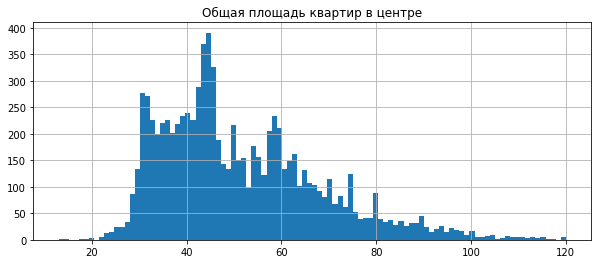

In [101]:
# гистограмма по значениям столбца total_area
data_spb.query('cityCenters_km > 7')['total_area'].hist(bins=100,figsize=(10,4))
plt.title('Общая площадь квартир в центре')

Text(0.5, 1.0, 'Распределение стоимости квартир в центре')

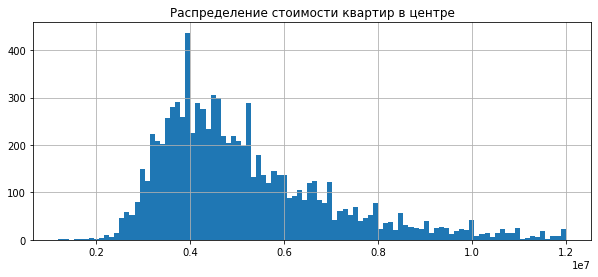

In [102]:
# гистограмма по значениям столбца last_price
data_spb.query('cityCenters_km > 7')['last_price'].hist(bins=100,figsize=(10,4))
plt.title('Распределение стоимости квартир в центре')

Text(0.5, 1.0, 'Распределение цены за квадратный метр квартир в центре')

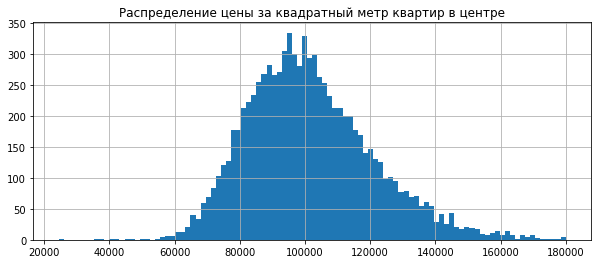

In [103]:
# гистограмма по значениям столбца price_m2
data_spb.query('cityCenters_km > 7')['price_m2'].hist(bins=100,figsize=(10,4))
plt.title('Распределение цены за квадратный метр квартир в центре')

Text(0.5, 1.0, 'Количество комнат в квартирах в центре')

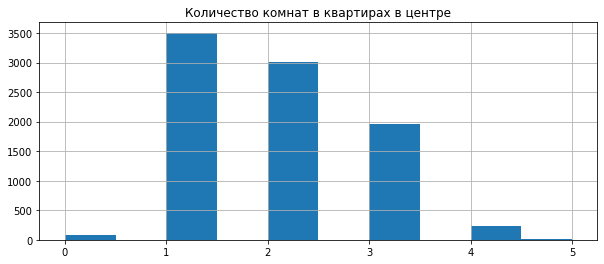

In [104]:
# гистограмма по значениям столбца rooms
data_spb.query('cityCenters_km > 7')['rooms'].hist(bins=10,figsize=(10,4))
plt.title('Количество комнат в квартирах в центре')

Text(0.5, 1.0, 'Высота потолков')

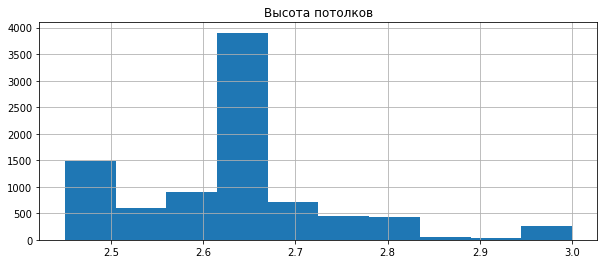

In [105]:
# гистограмма по значениям столбца rooms
data_spb.query('cityCenters_km > 7')['ceiling_height'].hist(bins=10,figsize=(10,4))
plt.title('Высота потолков')

Судя по гистограммам, большинство квартир в центре:
- однокомнатные или двухкомнатные,
- с жилой площадью до 100 м2
- с ценой за квадратный метр от 70 то 140 тыс рублей
- с высотой потолков до 2.8 м.

Общая цена квартир не превышает 12 млн.рублей, 75 % квартир - стоят до 8.5 млн. 

In [106]:
# коэффициент Пирсона
print('Корреляция для удаленности от центра: ',data_spb['cityCenters_km'].corr(data_spb_centre['last_price']))
print('Корреляция для площади: ',data_spb_centre['total_area'].corr(data_spb_centre['last_price']))
print('Корреляция для количества комнат: ',data_spb_centre['rooms'].corr(data_spb_centre['last_price']))
print('Корреляция для высоты потолков: ',data_spb_centre['ceiling_height'].corr(data_spb_centre['last_price']))

Корреляция для удаленности от центра:  -0.15153173074124676
Корреляция для площади:  0.7537005386280626
Корреляция для количества комнат:  0.48820767113441393
Корреляция для высоты потолков:  0.11754482988029745


Text(0.5, 1.0, 'Зависимость цены от категории этажа')

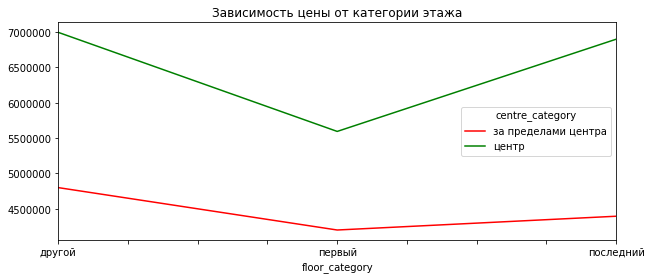

In [107]:
# построение графика для визуализации распределения значений в зависимоти от этажа
ax= (data_spb.query('cityCenters_km > 7')
     .pivot_table(index = 'floor_category',columns='centre_category',values = 'last_price',aggfunc = 'median')
     .plot(color = 'red',figsize=(10,4)))
(data_spb_centre
 .pivot_table(index = 'floor_category',columns='centre_category',values = 'last_price',aggfunc = 'median')
 .plot(ax=ax, color = 'green',figsize=(10,4)))

plt.title('Зависимость цены от категории этажа')

Text(0.5, 1.0, 'Зависимость цены от количества комнат')

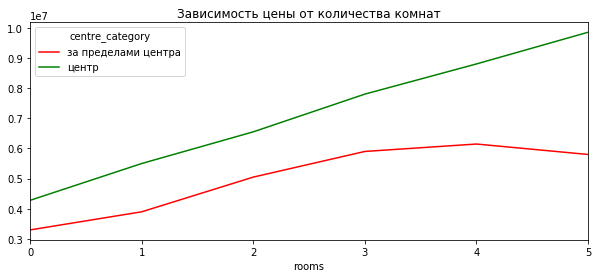

In [108]:
# построение графика для визуализации распределения значений в зависимоти от количества комнат
ax= (data_spb.query('cityCenters_km > 7')
     .pivot_table(index = 'rooms',columns='centre_category',values = 'last_price',aggfunc = 'median')
     .plot(color = 'red',figsize=(10,4)))
(data_spb_centre
 .pivot_table(index = 'rooms',columns='centre_category',values = 'last_price',aggfunc = 'median')
 .plot(ax=ax, color = 'green',figsize=(10,4)))

plt.title('Зависимость цены от количества комнат')

Также выясним как дата размещения объявления влияет на медианную стоимость квартиры в центре и отличаются ли полученные результаты в от общих выводов по всему городу.

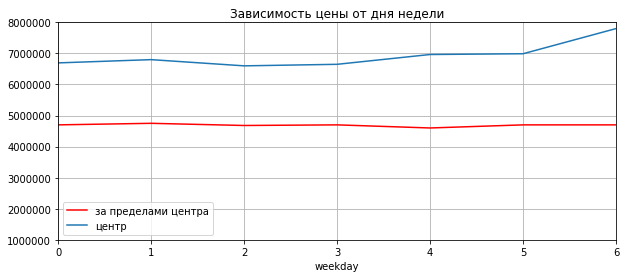

In [109]:
# постороение графика зависимости цены от дня недели в центре СПБ и в остальной части города
ax= (data_spb.query('cityCenters_km > 7')
    .pivot_table(index='weekday',columns='centre_category',values='last_price',aggfunc='median')
    .plot(ylim=(1000000,8000000),figsize=(10,4),grid=True,color='red')
    )
(data_spb_centre
 .pivot_table(index='weekday',columns='centre_category',values='last_price',aggfunc='median')
 .plot(ylim=(1000000,8000000),figsize=(10,4),ax=ax,grid=True))

plt.title('Зависимость цены от дня недели')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Зависимость цены от месяца')

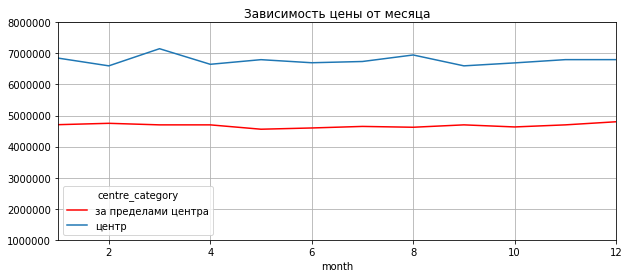

In [110]:
# постороение графика зависимости цены от месяца продажи в центре СПБ и в остальной части города
ax= (data_spb.query('cityCenters_km > 7')
    .pivot_table(index='month',columns='centre_category',values='last_price',aggfunc='median')
    .plot(ylim=(1000000,8000000),figsize=(10,4),grid=True,color='red'))
(data_spb_centre
 .pivot_table(index='month',columns='centre_category',values='last_price',aggfunc='median')
 .plot(ylim=(1000000,8000000),figsize=(10,4),ax=ax,legend=True,grid=True))

plt.title('Зависимость цены от месяца')

Text(0.5, 1.0, 'Зависимость цены от года')

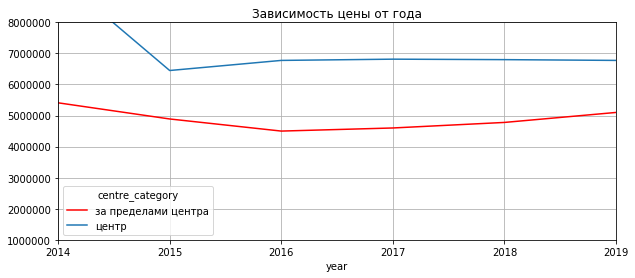

In [111]:
# постороение графика зависимости цены от года продажи в центре СПБ и в остальной части города
ax= (data_spb.query('cityCenters_km > 7')
    .pivot_table(index='year',columns='centre_category',values='last_price',aggfunc='median')
    .plot(ylim=(1000000,8000000),figsize=(10,4),grid=True,color='red'))
(data_spb_centre
 .pivot_table(index='year',columns='centre_category',values='last_price',aggfunc='median')
 .plot(ylim=(1000000,8000000),figsize=(10,4),ax=ax,legend=True,grid=True))

plt.title('Зависимость цены от года')

**Вывод**

В данном пункте были проанализированы данные из двух таблиц: data_spb - все квратиры в пределах Санкт-Петербурга, data_spb_centre - квартиры в центре Санкт-Петербурга ( в пределах 7 км от центра). По графикам видно, что средние цены в центральной части явно выше, чем за ее пределами. Также отмечается заметная взаимосвязь цены от таких значений как общая площадь и количество комнат.  

По графикам также можно заметить, что взаимосвзязь цены от различных параметров в центре в целом схожа с данными за пределами центра.


## Общий вывод

Итак,был произведен анализ данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет (с 27 ноября 2014 по 3 мая 2019). Из 23 699 обьявлений исходной таблицы, по различным параметрам были исключены редкие и выбивающихся значения. Далее, данные из диапазона нормальных значений были добавлены в новый список - good_data, в которую в итоге вошло 17000 значений.

На основе данных из таблицы good_data было определено  зависит ли цена от площади, числа комнат, удалённости от центра,этажа и даты размещения обьявления. Судя по общим данным высокой взимосвязи между этими параметрами не было выявлено.
Далее был выделен более узкий диапазон данных с квартирами, которые расположены в центре Санкт-Петербурга(до 7 км от центра). Здесь же ситауция с взимосвязями явно отличается от полученных значений в талице с общими данными. 

Заметная обратная взимоствязь цены за м2 была выявлена с общей площадью - чем больше общая площадь квартиры тем ниже цена за квадратный метр, а также с количеством комнат- чем больше комнат - тем ниже цена за квадратный метр.

Независимо от расположения квартиры, дешевле всего обходятся квартиры на первом этаже. 